# Bloomberg Analysis

# Part 1

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl 
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [162]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [190]:
df=pd.read_csv("df_Vs3.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
0,0,0,AAPL US Equity,APPLE INC,2.045320e+12,1,Technology,NASDAQ GS,UNITED STATES,US,...,80.46,91.03,108.94,134.18,116.79,108.77,0.956738,pos_performers,High Value,high_positive_performance
1,1,1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887800e+12,2,Energy,Saudi Arabia,SAUDI ARABIA,SA,...,8.76,8.72,8.80,9.40,9.53,9.12,0.384372,no_data,High Value,no data
2,2,2,MSFT US Equity,MICROSOFT CORP,1.642370e+12,3,Technology,NASDAQ GS,UNITED STATES,US,...,182.83,204.70,216.54,227.27,212.46,202.33,0.540618,pos_performers,High Value,high_positive_performance
3,3,3,AMZN US Equity,AMAZON.COM INC,1.571010e+12,4,Communications,NASDAQ GS,UNITED STATES,US,...,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48,0.771315,pos_performers,High Value,high_positive_performance
4,4,4,GOOGL US Equity,ALPHABET INC-A,1.202590e+12,5,Communications,NASDAQ GS,UNITED STATES,US,...,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32,0.568911,pos_performers,High Value,high_positive_performance


In [191]:
df.shape

(4937, 32)

# Cleaning Data

Missing Values

In [192]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
Ticker                        0
Short Name                    0
Market Cap                    0
Rank(Current Market Cap)      0
Sector                        0
Prim Exch Nm                  0
Country                       0
Cntry of Incorp               0
Best Analyst Rating         113
52Wk High                     0
52Wk Low                      0
52Wk Low Dt                   0
52Wk High Dt                  0
1Y Tot Ret (%)                0
2/12/2019                     0
1/1/2020                      0
3/2/2020                      0
2/3/2020                      0
1/4/2020                      0
1/5/2020                      0
1/6/2020                      0
1/7/2020                      0
3/8/2020                      0
1/9/2020                      0
1/10/2020                     0
2/11/2020                     0
ratio_yearvar_meanprice       2
performance category          0
Value category                0
performa

In [193]:
# handling the 2 missing values found in "ratio_yearvar_meanprice", one of the variables that will be used in regression.

df_nan = df[df["ratio_yearvar_meanprice"].isnull() == True]

In [194]:
df_nan

,Unnamed: 0.1,Unnamed: 0,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
2604,2604,2604,VTBR RM Equity,VTB BANK,6.319216e+09,2610,Financial,MICEX Main,RUSSIA,RU,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,neg_performers,Middle Value,high_negative_performance
4352,4352,4352,FEES RM Equity,FEDERAL GRID CO,3.311288e+09,4378,Utilities,MICEX Main,RUSSIA,RU,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,pos_performers,Low Value,moderate_positive_performance


In [195]:
df = df[df["ratio_yearvar_meanprice"].isnull() == False]

In [196]:
df.shape

(4935, 32)

In [197]:
dups = df.duplicated()

In [198]:
# Num of Dups
dups.shape

(4935,)

Extreme Values

C:\Users\Bahar\AppData\Local\Temp\ipykernel_11108\3340920430.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["1Y Tot Ret (%)"], bins=100)
C:\Temp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='1Y Tot Ret (%)', ylabel='Density'>

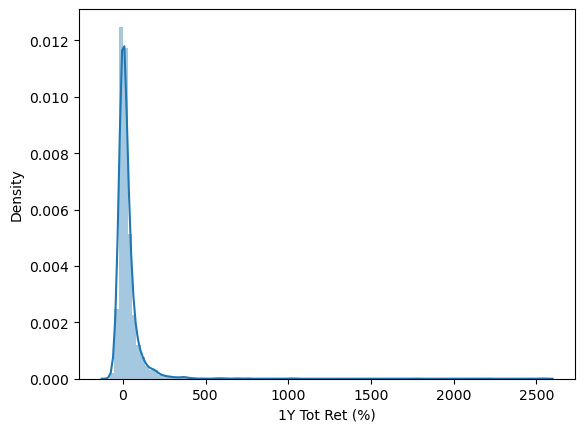

In [199]:
# Shows extreme values

sns.distplot(df["1Y Tot Ret (%)"], bins=100)

# There are outlier companies that performed much better than mean. 

# But there is no reasonable justification for removing them at this point.

In [200]:
df["1Y Tot Ret (%)"].mean()

26.126739614994932

In [201]:
df["1Y Tot Ret (%)"].max()

2547.54

In [202]:
df["1Y Tot Ret (%)"].min()

-77.79

Exploring data visually

In [176]:
# Creating a dataframe that excludes companies that are listed in the stockmarket for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero. 

df_clean2 = df[df["1Y Tot Ret (%)"] != 0]

In [669]:
df.shape

(4937, 33)

<Figure size 800x400 with 0 Axes>

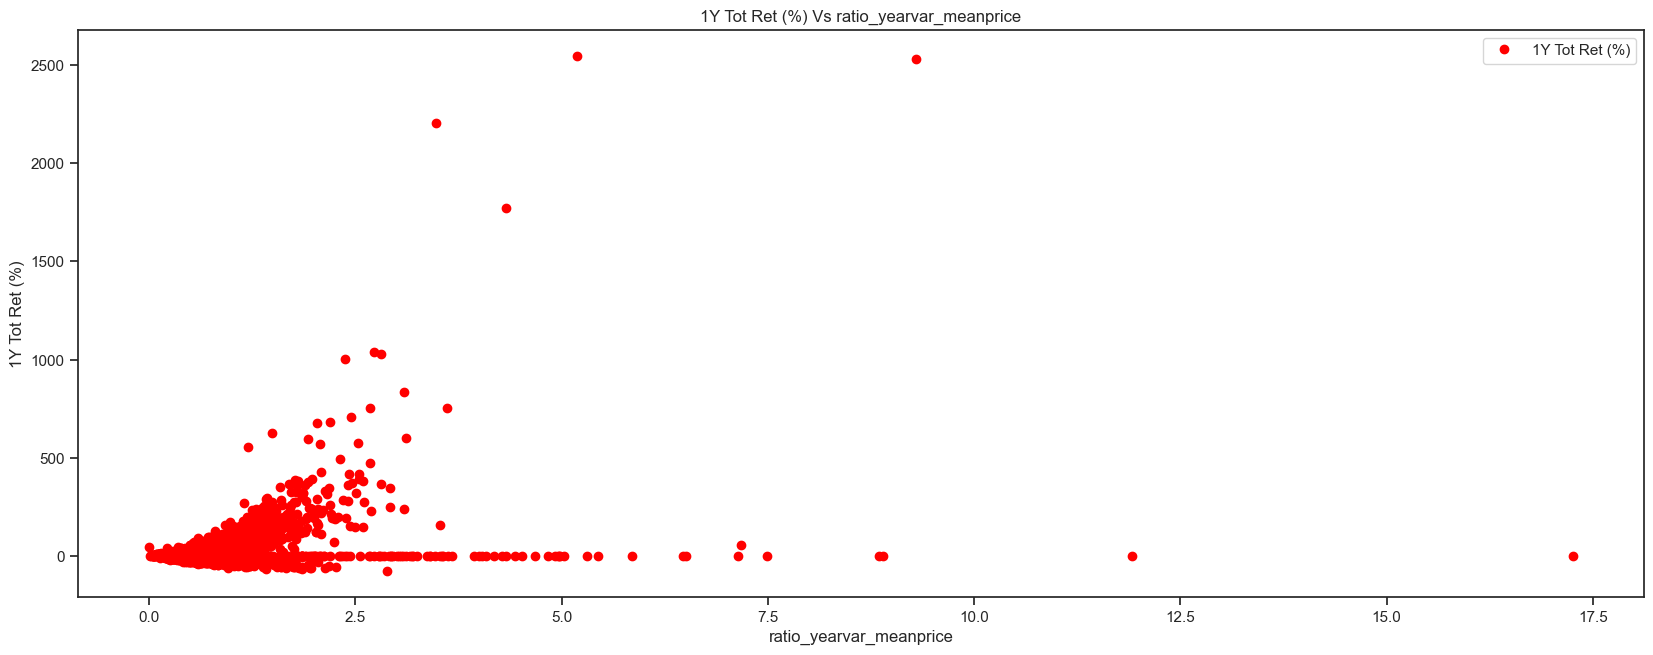

In [689]:
# Creating a scatterplot using matplotlib 
plt.figure(figsize=(8, 4))  # Set size
df.plot(x = "ratio_yearvar_meanprice", y="1Y Tot Ret (%)" ,style='o', color='red') 
plt.title("1Y Tot Ret (%) Vs ratio_yearvar_meanprice")  
plt.xlabel("ratio_yearvar_meanprice")  
plt.ylabel("1Y Tot Ret (%)")  
plt.show()

Defining hypothesis

Companies that experienced significant declines in value during the early stages of the pandemic are more likely to show greater overall performance throughout the year.

Reshaping the variables into NumPy arrays, with X = independent variable and y = dependent variable.

In [84]:
# Reshaping the variables into NumPy arrays 

X = df["ratio_yearvar_meanprice"].values.reshape(-1,1)
y = df["1Y Tot Ret (%)"].values.reshape(-1,1)

In [101]:
X

array([[0.95673831],
       [0.54061772],
       [0.77131536],
       ...,
       [0.17565573],
       [0.09644018],
       [1.27687045]])

In [88]:
y

array([[79.75],
       [43.23],
       [77.83],
       ...,
       [ 4.05],
       [ 2.99],
       [87.66]])

Spliting the data into two sets: a training set and a test set

In [89]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
X_train.shape

(3345, 1)

In [91]:
X_test.shape

(1434, 1)

Running a linear regression 

In [92]:
# Creating a regression object

regression = LinearRegression()  

In [93]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

In [95]:
y_predicted

array([[ 17.31010769],
       [-11.82452988],
       [-11.93022887],
       ...,
       [ 55.59420091],
       [ 25.77937818],
       [ 33.34078007]])

Creating a plot that shows the regression line on the test set

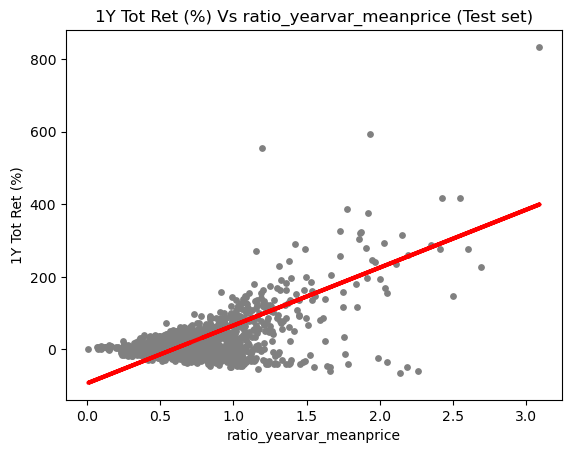

In [204]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("1Y Tot Ret (%) Vs ratio_yearvar_meanprice (Test set)")
plot_test.xlabel("ratio_yearvar_meanprice")
plot_test.ylabel("1Y Tot Ret (%)")
plot_test.show()

Interpreting fit:
The model does not seem to be well fitted to the data
Especially for the cases where the "ratio_yearvar_meanprice" is higher
clearly there are more variables that need to be taken into consideration when predicting "1Y Tot Ret (%)"

Checking the model performance statistics - MSE and R2

In [102]:
# Creating objects that contain the model summary statistics

# The root mean squared error
rmse = mean_squared_error(y_test, y_predicted) 

# The R2 score
r2 = r2_score(y_test, y_predicted)


In [205]:
#Printing the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[159.25214182]]
Mean squared error:  3090.5848886129374
R2 score:  0.21023736389859915


Comparing the predicted y values with the actual y values in a dataframe

In [206]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24.20,17.310108
1,15.71,-11.824530
2,-30.64,-11.930229
3,-4.40,36.113479
4,17.15,99.867375
5,76.89,77.826041
6,-20.56,21.998004
7,-0.66,-20.748098
8,-17.16,6.254538
9,141.12,95.676398


The slope is positive as expected.
The MSE is very large. Prediction is not accurate.
The low R2 also confirms the poor fit.
clearly there are more variables that need to be taken into consideration when predicting "1Y Tot Ret (%)".
Especially during such a singular period of the world economy.
Impact of data bias is non-existant.

In [136]:
# Save DataFrame
df.to_csv('path_to_save\ df_clean2.csv', index=False)

# part 2

In [290]:
df.shape

(4935, 32)

In [291]:
df_clean2.shape

(4779, 32)

In [292]:
# removing categorical and prices columns 

df_num = df_clean2[['Market Cap', '1Y Tot Ret (%)', 'ratio_yearvar_meanprice']]

In [293]:
df_num.describe()

,Market Cap,1Y Tot Ret (%),ratio_yearvar_meanprice
count,4.779000e+03,4779.000000,4779.000000
mean,1.897072e+10,26.979590,0.761016
std,6.108303e+10,94.799095,0.408997
min,2.751337e+09,-77.790000,0.000000
25%,4.083476e+09,-7.780000,0.518315
50%,6.813822e+09,8.670000,0.682705
75%,1.509442e+10,35.695000,0.917707
max,2.045320e+12,2547.540000,9.289960


In [294]:
# Multiplying "ratio_yearvar_meanprice" by 100 to reduce the difference between variables’ scales

df_num["ratio_yearvar_meanprice_100"] = 100 * df_num["ratio_yearvar_meanprice"] 

C:\Users\Bahar\AppData\Local\Temp\ipykernel_11108\4065450234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["ratio_yearvar_meanprice_100"] = 100 * df_num["ratio_yearvar_meanprice"]


In [295]:
df_num["ratio_yearvar_meanprice_100"].describe()

count    4779.000000
mean       76.101582
std        40.899678
min         0.000000
25%        51.831463
50%        68.270521
75%        91.770694
max       928.996010
Name: ratio_yearvar_meanprice_100, dtype: float64

In [296]:
# standardizing "Market Cap" by substituting original value by its 5th root

df_num["Market Cap_5root"] = df_num["Market Cap"] ** (1.0 / 5) 

C:\Users\Bahar\AppData\Local\Temp\ipykernel_11108\2821914365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Market Cap_5root"] = df_num["Market Cap"] ** (1.0 / 5)


In [297]:
df_num["Market Cap_5root"].describe()

count    4779.000000
mean       99.832696
std        22.735953
min        77.251829
25%        83.599948
50%        92.614323
75%       108.583360
max       289.835950
Name: Market Cap_5root, dtype: float64

In [298]:
# removing "ratio_yearvar_meanprice" and "Market Cap" columns 

df_num2 = df_num[['1Y Tot Ret (%)', 'ratio_yearvar_meanprice_100', 'Market Cap_5root']]

In [300]:
df_num2.describe()

,1Y Tot Ret (%),ratio_yearvar_meanprice_100,Market Cap_5root
count,4779.000000,4779.000000,4779.000000
mean,26.979590,76.101582,99.832696
std,94.799095,40.899678,22.735953
min,-77.790000,0.000000,77.251829
25%,-7.780000,51.831463,83.599948
50%,8.670000,68.270521,92.614323
75%,35.695000,91.770694,108.583360
max,2547.540000,928.996010,289.835950


Applying the Elbow Technique

In [372]:
# Defines the range of potential clusters in the data
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [373]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num2).score(df_num2) for i in range(len(kmeans))] 

score

C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params

[-53406533.8349016,
 -32192006.74639275,
 -18240163.503493592,
 -13121027.996732874,
 -10395329.664184984,
 -8636380.33372455,
 -7445134.315247786,
 -6395221.325345896,
 -5791566.6908100415]

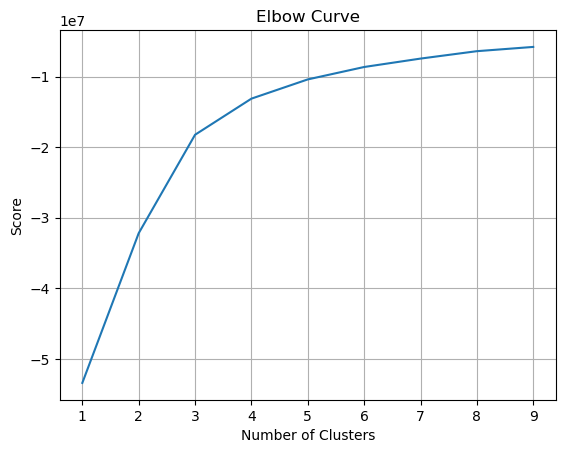

In [375]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.grid(True)
pl.show()


It appears that the optimal number of clusters is 4, after that the curve begins to flatten out.

Running the k-means algorithm

In [382]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [383]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [384]:
# Fitting the k-means object to the data.

kmeans.fit(df_num2)

C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

Attaching a new column to dataframe with the resulting clusters

In [385]:

df_num2['clusters'] = kmeans.fit_predict(df_num2)

C:\Temp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bahar\AppData\Local\Temp\ipykernel_11108\7172854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num2['clusters'] = kmeans.fit_predict(df_num2)


In [387]:
# Reset the index and drop the old index
df_num2.reset_index(drop=True, inplace=True)

# Now check the DataFrame
print(df_num2)


      1Y Tot Ret (%)  ratio_yearvar_meanprice_100  Market Cap_5root  clusters
0              79.75                    95.673831        289.835950         3
1              43.23                    54.061772        277.392172         0
2              77.83                    77.131536        274.938646         3
3              33.98                    56.891065        260.629468         0
4              36.94                    74.137817        239.897289         0
...              ...                          ...               ...       ...
4774          -37.81                   128.760000         77.287467         0
4775            7.36                    48.924746         77.276177         0
4776            4.05                    17.565573         77.275341         0
4777            2.99                     9.644018         77.260781         0
4778           87.66                   127.687045         77.251829         3

[4779 rows x 4 columns]


In [396]:
df_num2.head()

,1Y Tot Ret (%),ratio_yearvar_meanprice_100,Market Cap_5root,clusters
0,79.75,95.673831,289.835950,3
1,43.23,54.061772,277.392172,0
2,77.83,77.131536,274.938646,3
3,33.98,56.891065,260.629468,0
4,36.94,74.137817,239.897289,0


In [397]:
df_num2['clusters'].value_counts()

clusters
0    4117
3     612
1      46
2       4
Name: count, dtype: int64

In [398]:
df_num2.columns

Index(['1Y Tot Ret (%)', 'ratio_yearvar_meanprice_100', 'Market Cap_5root',
       'clusters'],
      dtype='object')

Creating visualizations using your clustered data

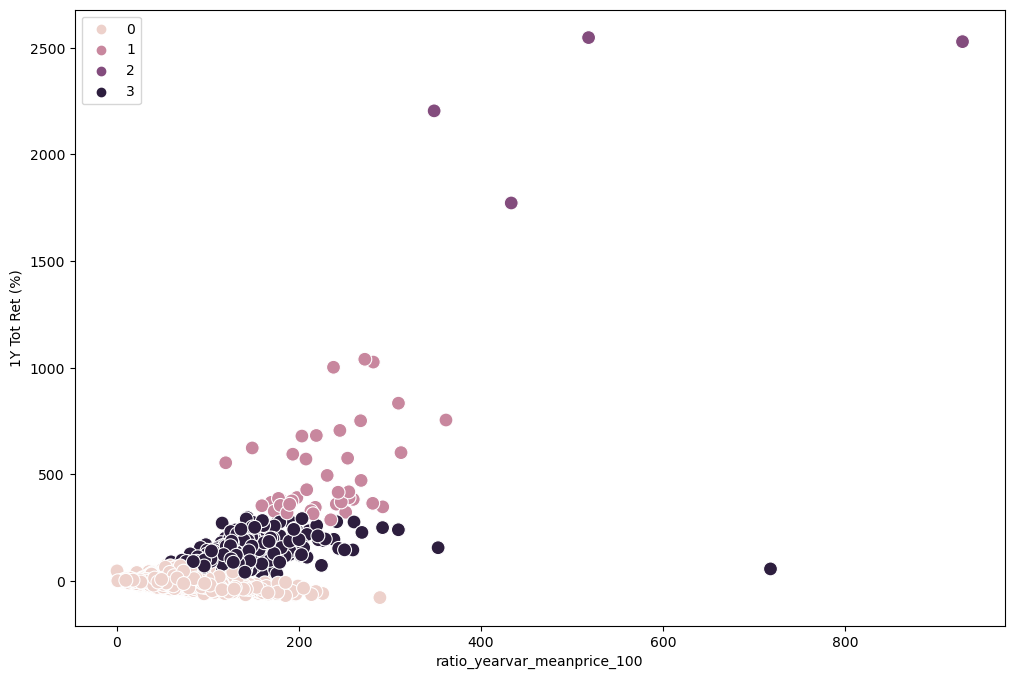

In [399]:
# Plotting the clusters for the 'ratio_yearvar_meanprice_100' and '1Y Tot Ret (%)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['ratio_yearvar_meanprice_100'], y=df_num2['1Y Tot Ret (%)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ratio_yearvar_meanprice_100') # Label x-axis.
plt.ylabel('1Y Tot Ret (%)') # Label y-axis.
plt.show()

The clusters make sense as they group the companies according to its yearly performance.
The clusters mark the distinction between winners and losers in the context of the pandemic.
cluster 2 makes only contains 4 companies.
But, I also tried it with 3 clusters and these four companies also had a cluster of their own.
In the end I decided that four clusters was more informative. Still, it is possible these 4 ouliers create bias.

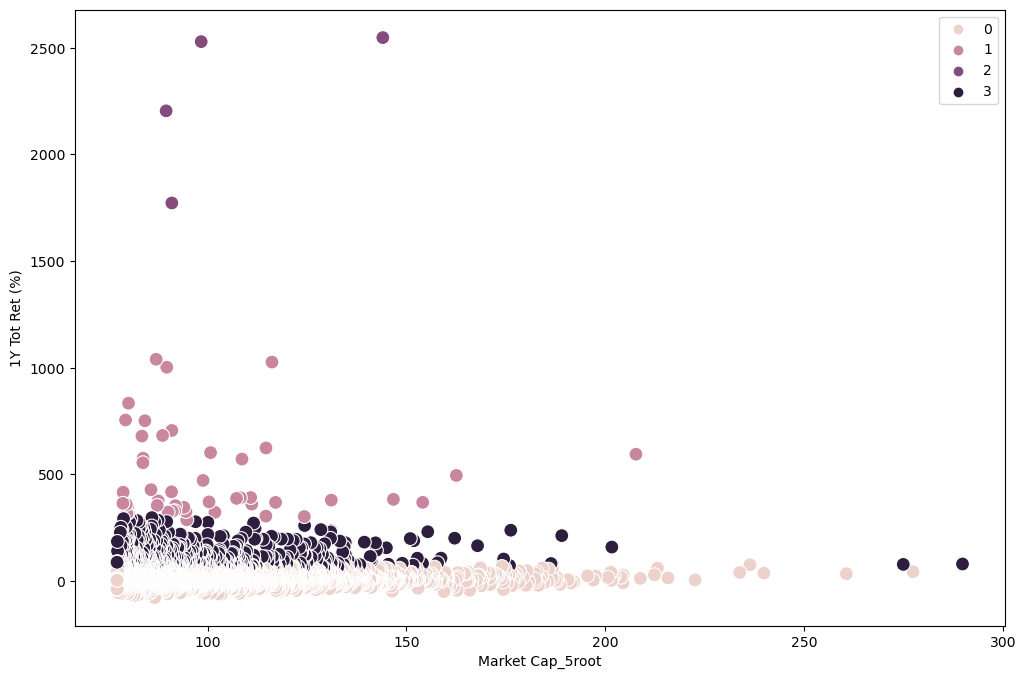

In [395]:
# Plotting the clusters for the 'ratio_yearvar_meanprice_100' and 'Market Cap_5root' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Market Cap_5root'], y=df_num2['1Y Tot Ret (%)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Market Cap_5root') # Label x-axis.
plt.ylabel('1Y Tot Ret (%)') # Label y-axis.
plt.show()

The clusters make sense as they group the companies according to their total value and yearly performance.
It shows performance was not determined by total value. The companies that outperformed were not necessarily the most valuable.
At the same time, among the companies that performed moderately, it is possible to find the entire spectrum of the data set in term of market capitalization.

Calculating e the descriptive statistics for the clusters using the groupby() function

In [400]:
df_num2.groupby('clusters').agg({'ratio_yearvar_meanprice_100':['mean', 'median'], 
                         'Market Cap_5root':['mean', 'median'], 
                         '1Y Tot Ret (%)':['mean', 'median']})

ratio_yearvar_meanprice_100             Market Cap_5root             \
                                mean      median             mean     median   
clusters                                                                       
0                          66.716094   63.285186       100.017779  92.769913   
1                         223.164455  216.613710       101.426056  91.847326   
2                         557.160013  475.621822       105.775187  94.717006   
3                         125.041006  116.646906        98.429018  91.876982   

         1Y Tot Ret (%)           
                   mean   median  
clusters                          
0              6.107496     4.05  
1            484.280435   384.95  
2           2263.057500  2366.27  
3            118.401585   101.99

In terms of yearly performance, most companies in cluster 0 performed moderately.

All the companies in clusters 1, 2 and 3, clearly won from the pandemic situation.

But between them there are staggering performance differences.

Cluster 2 comprises four companies that registered an average appreciation of 2263%!

In terms of market capitalization, the difference between the clusters' medians is relatively small.

Possibly suggesting this variable is not determinant for 1Y Tot Ret (%).


# Part 3

Proposition of future steps of an analytics pipeline:

Explore the differences in yearly performance using categorical variables
Explore time-series with the prices contained in dataset

In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [425]:
%matplotlib inline

In [426]:
df=pd.read_csv("df_Vs3.csv")
df.shape

(4937, 32)

Making a subsets of dataset
Analysing the price variation of one company, the price variation of Apple Inc stock.

In [684]:
# Creating a subset of the data relevant for time-series analysis
sub = df[['Short Name', '2/12/2019', '1/1/2020', '3/2/2020', '2/3/2020', '1/4/2020', 
          '1/5/2020', '1/6/2020', '1/7/2020', '3/8/2020', '1/9/2020', '1/10/2020', '2/11/2020']]


In [685]:
sub.head()

,Short Name,2/12/2019,1/1/2020,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020
0,APPLE INC,66.04,73.41,77.17,74.70,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77
1,SAUDI ARABIAN OI,0.00,9.36,9.05,8.74,8.13,8.42,8.76,8.72,8.80,9.40,9.53,9.12
2,MICROSOFT CORP,149.55,157.70,174.38,172.79,152.11,174.57,182.83,204.70,216.54,227.27,212.46,202.33
3,AMAZON.COM INC,1781.60,1847.84,2004.20,1953.95,1907.70,2286.04,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48
4,ALPHABET INC-A,1288.86,1339.39,1482.60,1386.32,1102.10,1317.32,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32


In [687]:
# Creating a sub-subset of the data of Apple Inc only

Apple = sub.loc[[0]]

In [688]:
Apple

,Short Name,2/12/2019,1/1/2020,3/2/2020,2/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020
0,APPLE INC,66.04,73.41,77.17,74.7,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77


In [431]:
# tranposing dataframe

Apple2 = Apple.T

In [432]:
# Deleting the first row

Apple3 = Apple2.drop(['Short Name'], axis=0)

In [433]:
# renaming column

Apple4 = Apple3.rename(columns={0: "price"})
Apple4

,price
02/12/2019,66.04
01/01/2020,73.41
03/02/2020,77.17
02/03/2020,74.7
01/04/2020,60.23
01/05/2020,72.27
01/06/2020,80.46
01/07/2020,91.03
03/08/2020,108.94
01/09/2020,134.18


Creating a line chart

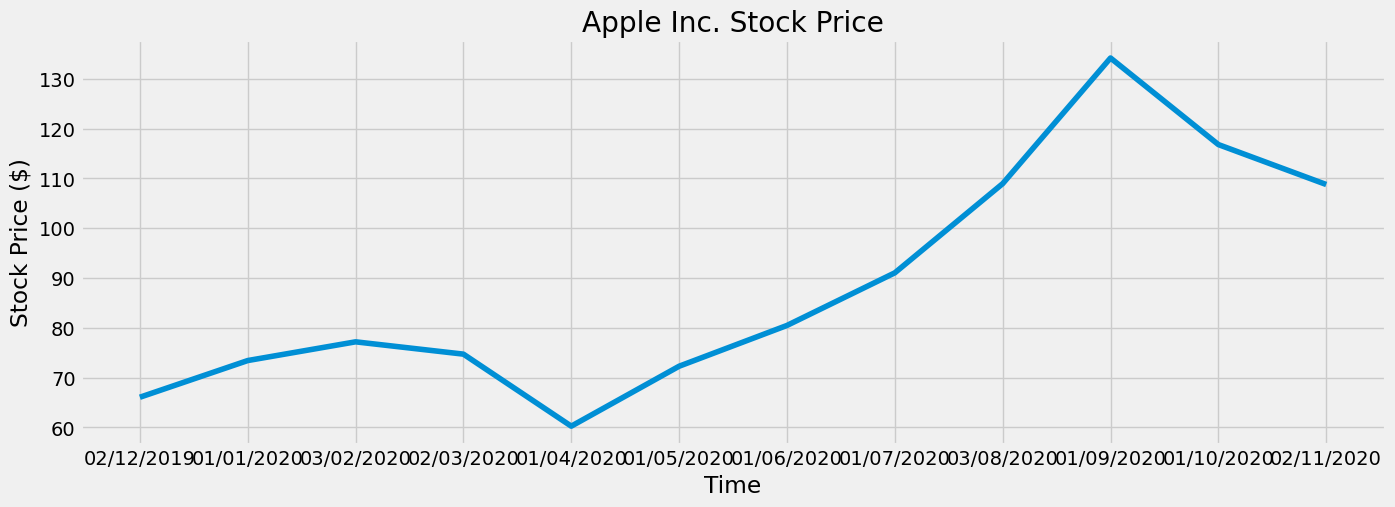

In [434]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.title('Apple Inc. Stock Price') # Label title.
plt.xlabel('Time') # Label x-axis.
plt.ylabel('Stock Price ($)') # Label y-axis.
plt.plot(Apple4)

Decomposing the data’s components.

In [435]:
# Reset index so that you can use the "Date" column as a filter

Apple7 = Apple4.reset_index()
Apple7

,index,price
0,02/12/2019,66.04
1,01/01/2020,73.41
2,03/02/2020,77.17
3,02/03/2020,74.7
4,01/04/2020,60.23
5,01/05/2020,72.27
6,01/06/2020,80.46
7,01/07/2020,91.03
8,03/08/2020,108.94
9,01/09/2020,134.18


In [436]:
# renaming column

Apple7 = Apple7.rename(columns={'index': "Date"})
Apple7

,Date,price
0,02/12/2019,66.04
1,01/01/2020,73.41
2,03/02/2020,77.17
3,02/03/2020,74.7
4,01/04/2020,60.23
5,01/05/2020,72.27
6,01/06/2020,80.46
7,01/07/2020,91.03
8,03/08/2020,108.94
9,01/09/2020,134.18


In [437]:
# Setting the "Date" column as the index

from datetime import datetime

Apple7['datetime'] = pd.to_datetime(Apple7['Date'], dayfirst=True) # Create a datetime column from "Date.""
Apple7 = Apple7.set_index('datetime') # Set the datetime as the index of the dataframe.
Apple7.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
Apple7

,price
datetime,
2019-12-02,66.04
2020-01-01,73.41
2020-02-03,77.17
2020-03-02,74.7
2020-04-01,60.23
2020-05-01,72.27
2020-06-01,80.46
2020-07-01,91.03
2020-08-03,108.94


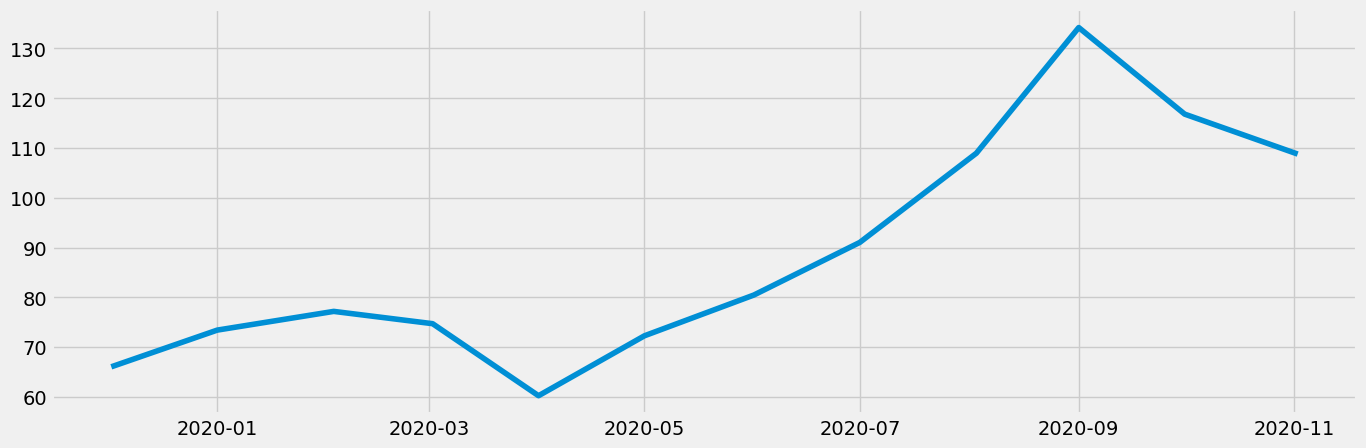

In [438]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Apple7)

In [439]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(Apple7, model='additive', period=1)

In [440]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

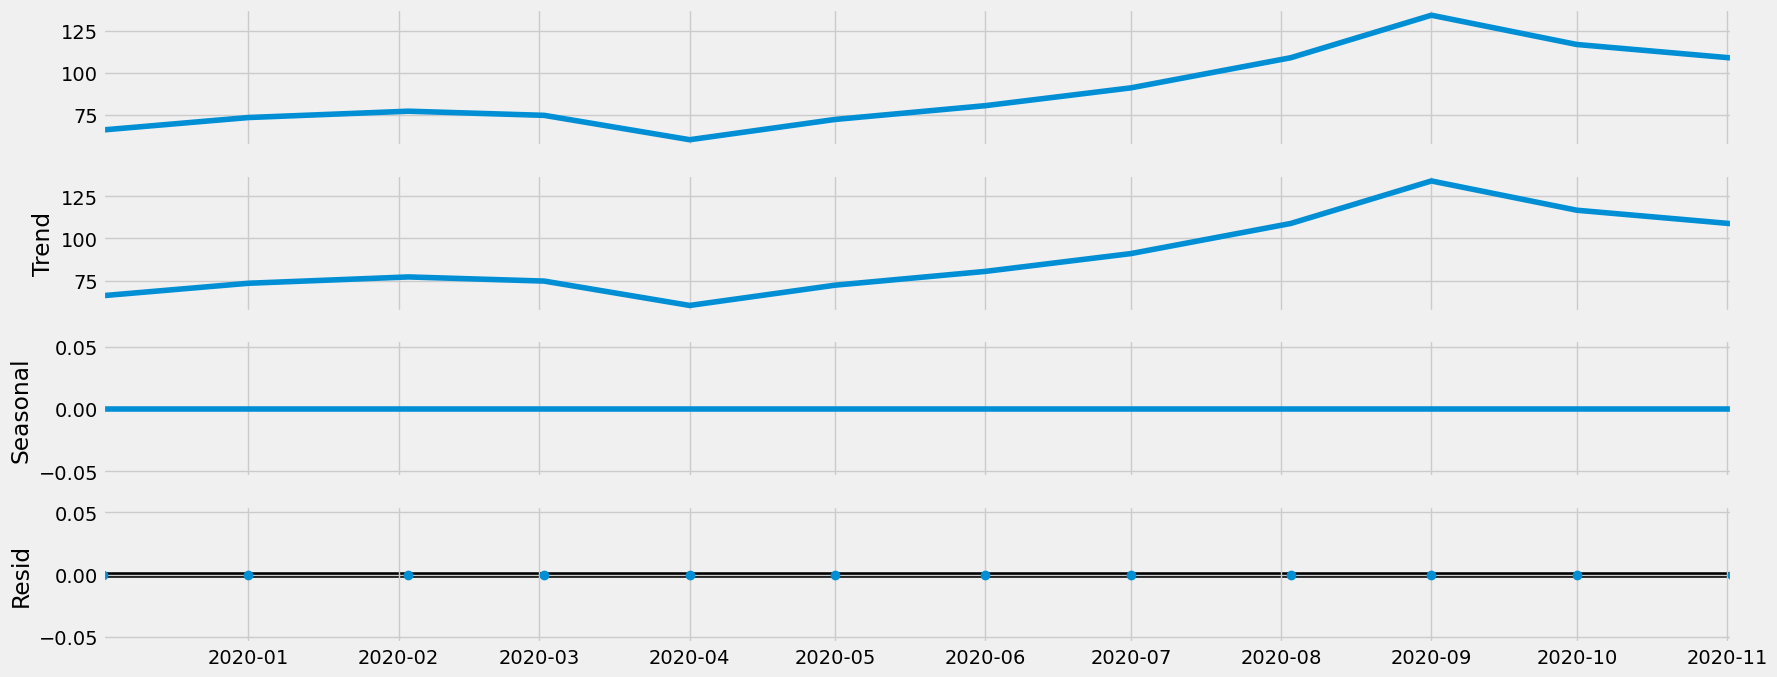

In [441]:
# Plot the separate components

decomposition.plot()
plt.show()

The presence of a dominant upward trend confirms that the time series is non-stationary. There is a dominant upward trend, which was interrupted in two period between 3Feb and 1Apr (the initial impact of COVID19) and from 1Sep to 2Nov.
No seasonality detected - the curve is flat. The period is also short for detecting seasonality.
The period between 3Feb and 1Apr can be interpreted as a cycle because there was a generalized drop in the stock market due to the initial impact of COVID19.
The fact that this dataset only includes a datapoint per month eliminates the noise that characterizes daily stock price data.

Conducting a Dickey-Fuller test to check for stationarity

In [442]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(Apple7['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.955001
p-value                         0.769321
Number of Lags Used             0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [ ]:
Interpretation:
    
The null hypothesis states that the time series has a unit root and is non-stationary.

p-value = 0.77, The high p-value supports the conclusion that we fail to reject the null hypothesis, indicating the
time series is non-stationary.

test statistic= -0.955001 is higher than all critical values. we do not have sufficient statistical 
evidence to reject the null hypothesis. Therefore, the test concludes that the time series is non-stationary.

Stationarizing the Data

In [443]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = Apple7 - Apple7.shift(1) 

In [450]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff.dropna(inplace = True) 

In [451]:
data_diff

,price
datetime,
2020-01-01,7.37
2020-02-03,3.76
2020-03-02,-2.47
2020-04-01,-14.47
2020-05-01,12.04
2020-06-01,8.19
2020-07-01,10.57
2020-08-03,17.91
2020-09-01,25.24


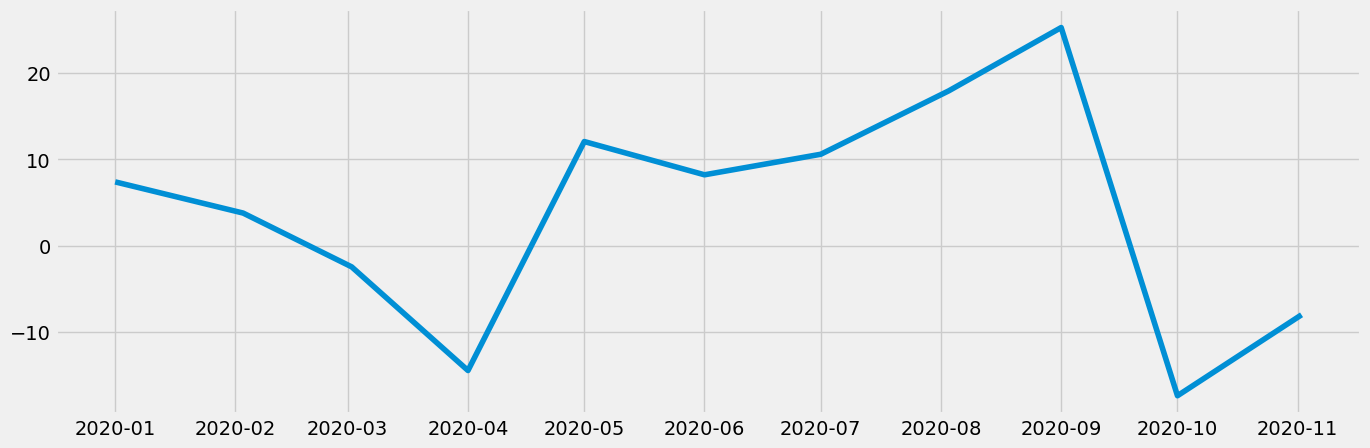

In [456]:
# plotting data_diff

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [457]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.349548
p-value                         0.156485
Number of Lags Used             0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Interpretation:
p-value = 0.15, which indicates the test result is non-significant.
test statistic -2.349548 is still higher than all critical values.

In [460]:
# performing another round of differencing 

data_diff2 = data_diff - data_diff.shift(1) 

In [461]:
# removing the missing values

data_diff2.dropna(inplace = True) 

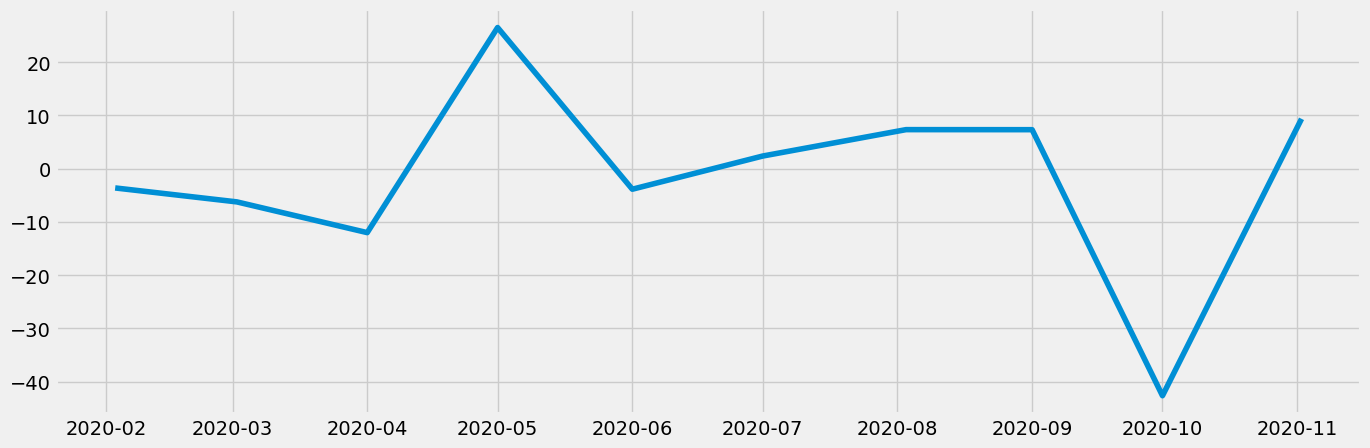

In [462]:
# plotting data_diff2

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [463]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -3.767851
p-value                        0.003254
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


Interpretation:
test statistic -3.767851 is now smaller than the critical value at both the five and ten percent significance levels.
p-value 0.003254 < 0.05
We can reject the null hypothesis and conclude that this series is stationary.

Checking data’s autocorrelations

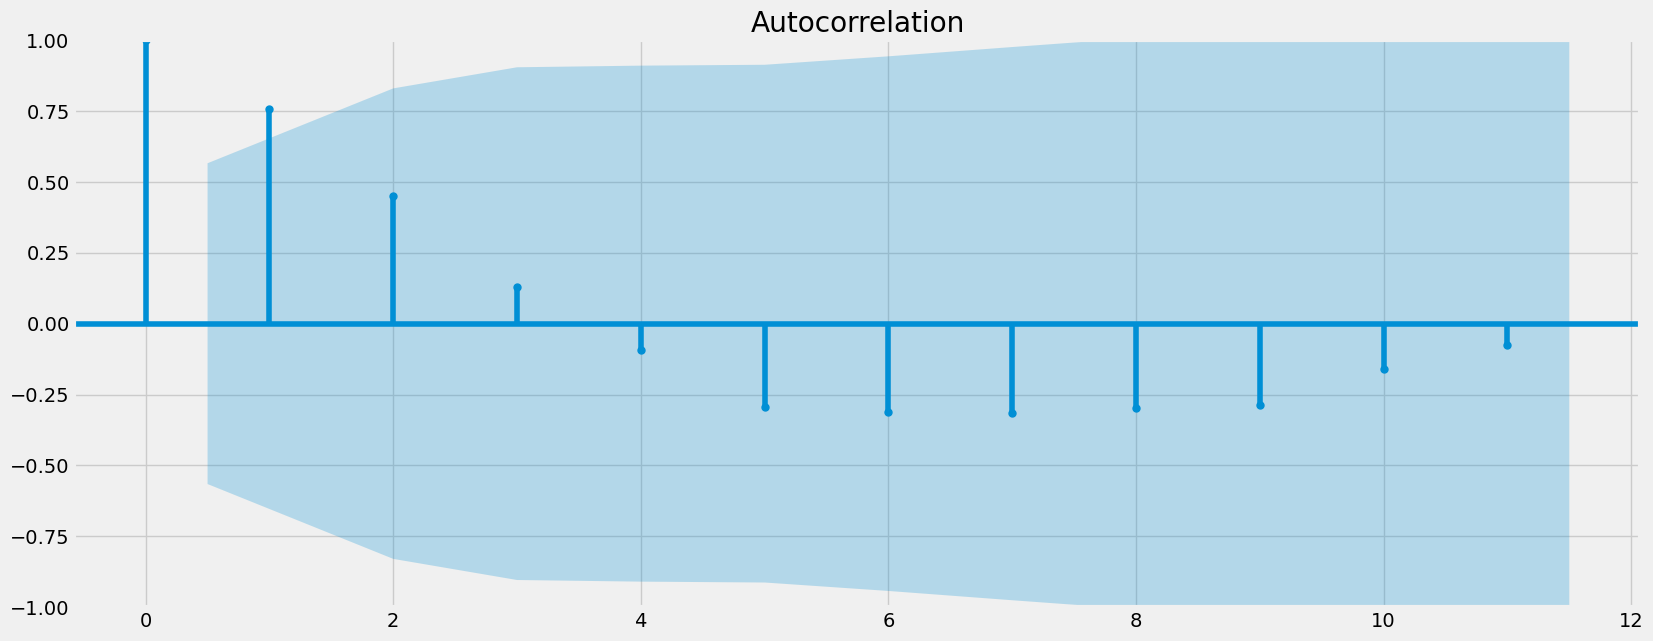

In [464]:
# plotting autocorrelations for non-stationary data-series

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(Apple7)
plt.show()

In [ ]:
Interpretation of ACF:
There are 2 lags correlated with each other and we know this series is non-stationary, 
due to the result of the Dickey-Fuller test.

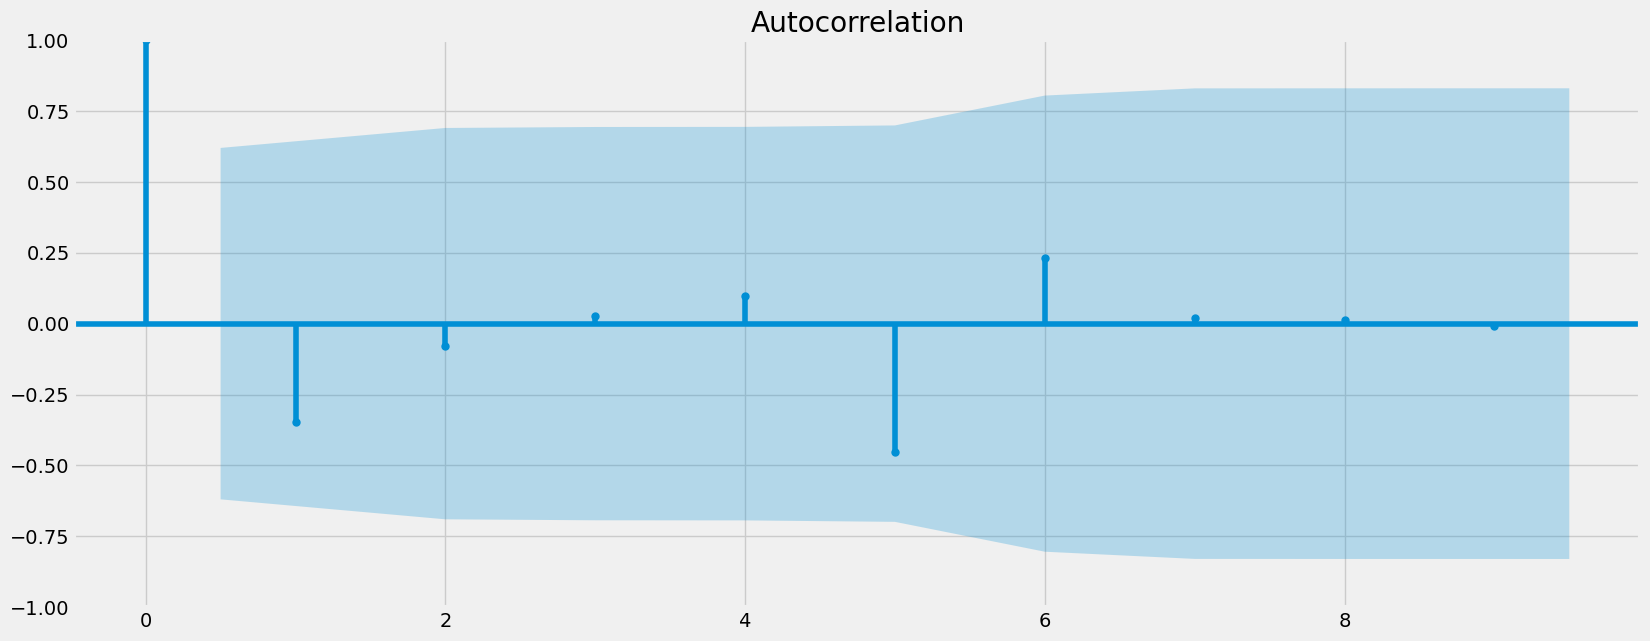

In [465]:
# plotting autocorrelations for stationary data-series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_diff2)
plt.show()

Interpretation of ACF:
There is a autocorrelation at lag 1, , indicating that each value in the series is influenced by its immediate predecessor. 
this series is stationary, due to the result of the Dickey-Fuller test.
While the autocorrelation plot has improved slightly, it’s still not perfect.
This means that, despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak.
However, the presence of autocorrelation highlights that the series retains some memory of past values, which is important for modeling considerations. Future work could explore modeling the data potentially using AR(1) models. 

# Part 4

In [548]:
df=pd.read_csv("df_Vs3.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,1/6/2020,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
0,0,0,AAPL US Equity,APPLE INC,2.045320e+12,1,Technology,NASDAQ GS,UNITED STATES,US,...,80.46,91.03,108.94,134.18,116.79,108.77,0.956738,pos_performers,High Value,high_positive_performance
1,1,1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887800e+12,2,Energy,Saudi Arabia,SAUDI ARABIA,SA,...,8.76,8.72,8.80,9.40,9.53,9.12,0.384372,no_data,High Value,no data
2,2,2,MSFT US Equity,MICROSOFT CORP,1.642370e+12,3,Technology,NASDAQ GS,UNITED STATES,US,...,182.83,204.70,216.54,227.27,212.46,202.33,0.540618,pos_performers,High Value,high_positive_performance
3,3,3,AMZN US Equity,AMAZON.COM INC,1.571010e+12,4,Communications,NASDAQ GS,UNITED STATES,US,...,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48,0.771315,pos_performers,High Value,high_positive_performance
4,4,4,GOOGL US Equity,ALPHABET INC-A,1.202590e+12,5,Communications,NASDAQ GS,UNITED STATES,US,...,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32,0.568911,pos_performers,High Value,high_positive_performance


In [550]:
df.shape

(4937, 32)

In [601]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '2/12/2019',
       '1/1/2020', '3/2/2020', '2/3/2020', '1/4/2020', '1/5/2020', '1/6/2020',
       '1/7/2020', '3/8/2020', '1/9/2020', '1/10/2020', '2/11/2020',
       'ratio_yearvar_meanprice', 'performance category', 'Value category',
       'performance category_2', 'firm_excess_return'],
      dtype='object')

Creating new variables

In [602]:
# New variable name: firm_excess_return

# New variable: ratio between "the difference between 52Wk High price and 52Wk Low price" and "average_52wk_price"

df["firm_excess_return"] = (df["1Y Tot Ret (%)"])/(df["1Y Tot Ret (%)"].mean())

In [603]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '2/12/2019',
       '1/1/2020', '3/2/2020', '2/3/2020', '1/4/2020', '1/5/2020', '1/6/2020',
       '1/7/2020', '3/8/2020', '1/9/2020', '1/10/2020', '2/11/2020',
       'ratio_yearvar_meanprice', 'performance category', 'Value category',
       'performance category_2', 'firm_excess_return'],
      dtype='object')

In [604]:
df["firm_excess_return"].describe()

count    4937.000000
mean        1.000000
std         3.576321
min        -2.978878
25%        -0.275333
50%         0.281077
75%         1.312330
max        97.555104
Name: firm_excess_return, dtype: float64

In [605]:
df["1Y Tot Ret (%)"].mean()

26.113856593072715

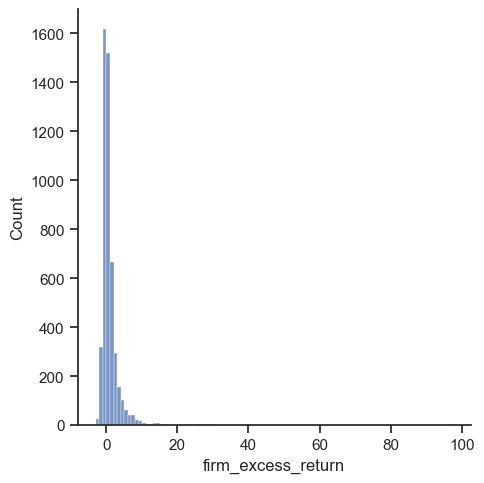

In [606]:
sns.displot(df["firm_excess_return"], bins= 100)

In [607]:
# Creating a dataframe that excludes companies that are listed for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero 

df2 = df[df["1Y Tot Ret (%)"] != 0]

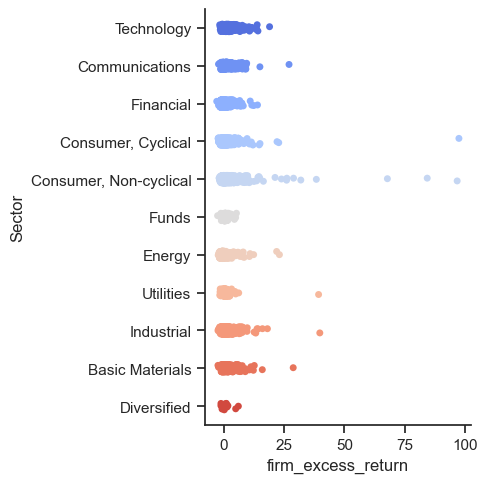

In [608]:
# Creating a categorical plot to study the distribution of "1Y Tot Ret" by sector.

sns.set(style="ticks")
g = sns.catplot(x="firm_excess_return", y="Sector", data= df2, palette="coolwarm")

In [648]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,1/7/2020,3/8/2020,1/9/2020,1/10/2020,2/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2,firm_excess_return
0,0,0,AAPL US Equity,APPLE INC,2.045320e+12,1,Technology,NASDAQ GS,UNITED STATES,US,...,91.03,108.94,134.18,116.79,108.77,0.956738,pos_performers,High Value,high_positive_performance,3.053934
2,2,2,MSFT US Equity,MICROSOFT CORP,1.642370e+12,3,Technology,NASDAQ GS,UNITED STATES,US,...,204.70,216.54,227.27,212.46,202.33,0.540618,pos_performers,High Value,high_positive_performance,1.655443
3,3,3,AMZN US Equity,AMAZON.COM INC,1.571010e+12,4,Communications,NASDAQ GS,UNITED STATES,US,...,2878.70,3111.89,3499.12,3221.26,3004.48,0.771315,pos_performers,High Value,high_positive_performance,2.980410
4,4,4,GOOGL US Equity,ALPHABET INC-A,1.202590e+12,5,Communications,NASDAQ GS,UNITED STATES,US,...,1442.00,1482.76,1655.08,1487.90,1624.32,0.568911,pos_performers,High Value,high_positive_performance,1.301225
5,5,5,FB US Equity,FACEBOOK INC-A,7.945600e+11,6,Communications,NASDAQ GS,UNITED STATES,US,...,237.55,251.96,295.44,266.63,261.36,0.741378,pos_performers,High Value,high_positive_performance,1.414575


In [649]:
# Define the aggregation dictionary
aggregation_methods = {
    'Market Cap': 'mean',  # Average of market cap within each sector
    'Rank(Current Market Cap)': 'mean',  # Average rank within each sector
    'Best Analyst Rating': 'mean',  # Average of analyst ratings
    '52Wk High': 'max',  # Average of 52-week high prices
    '52Wk Low': 'min',  # Average of 52-week low prices
    '1Y Tot Ret (%)': 'mean',  # Average of 1-year total returns
    'ratio_yearvar_meanprice': 'mean', # Average of ratio in years
    'firm_excess_return': 'mean'  # Average of firm excess returns
}


In [650]:
# Perform aggregation based on the defined methods
df2_reduced = df2.groupby('Sector').agg(aggregation_methods).reset_index()

In [651]:
df2_reduced.head(20)

,Sector,Market Cap,Rank(Current Market Cap),Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),ratio_yearvar_meanprice,firm_excess_return
0,Basic Materials,1.264630e+10,2617.592357,3.917072,7124.40,0.03,37.470669,0.820123,1.434896
1,Communications,4.005229e+10,2143.104730,3.971748,3552.25,0.01,34.617534,0.779472,1.325639
2,"Consumer, Cyclical",1.689358e+10,2497.115658,3.942012,4530.00,0.11,31.458399,0.873953,1.204663
3,"Consumer, Non-cyclical",2.062503e+10,2364.349526,4.088793,95315.52,0.05,45.643483,0.795814,1.747865
4,Diversified,8.850449e+09,2904.588235,4.236878,353.65,0.25,17.190000,0.771549,0.658271
5,Energy,1.764464e+10,2398.494253,4.106381,2955.97,0.06,13.279310,1.027958,0.508516
6,Financial,1.666105e+10,2460.654088,3.818823,350000.00,0.00,1.174465,0.712172,0.044975
7,Funds,1.507816e+10,2594.026810,0.013441,701.20,0.12,12.249732,0.434290,0.469089
8,Industrial,1.278192e+10,2679.809942,4.064029,8883.28,0.04,31.343816,0.773454,1.200275
9,Technology,3.229857e+10,2323.113260,4.187381,1244.64,0.06,51.564144,0.849434,1.974589


In [652]:
# Creating a reduced dataframe 

df2_reduced = df2[[ 'Sector',  'Market Cap',  'firm_excess_return']]

In [653]:
df2_reduced.groupby(['Sector']).mean()

,Market Cap,firm_excess_return
Sector,,
Basic Materials,1.264630e+10,1.434896
Communications,4.005229e+10,1.325639
"Consumer, Cyclical",1.689358e+10,1.204663
"Consumer, Non-cyclical",2.062503e+10,1.747865
Diversified,8.850449e+09,0.658271
Energy,1.764464e+10,0.508516
Financial,1.666105e+10,0.044975
Funds,1.507816e+10,0.469089
Industrial,1.278192e+10,1.200275


In [654]:
result = df2_reduced.groupby(["Sector"])['firm_excess_return'].aggregate(np.mean).reset_index().sort_values('firm_excess_return')

In [655]:

result

,Sector,firm_excess_return
6,Financial,0.044975
10,Utilities,0.440284
7,Funds,0.469089
5,Energy,0.508516
4,Diversified,0.658271
8,Industrial,1.200275
2,"Consumer, Cyclical",1.204663
1,Communications,1.325639
0,Basic Materials,1.434896
3,"Consumer, Non-cyclical",1.747865


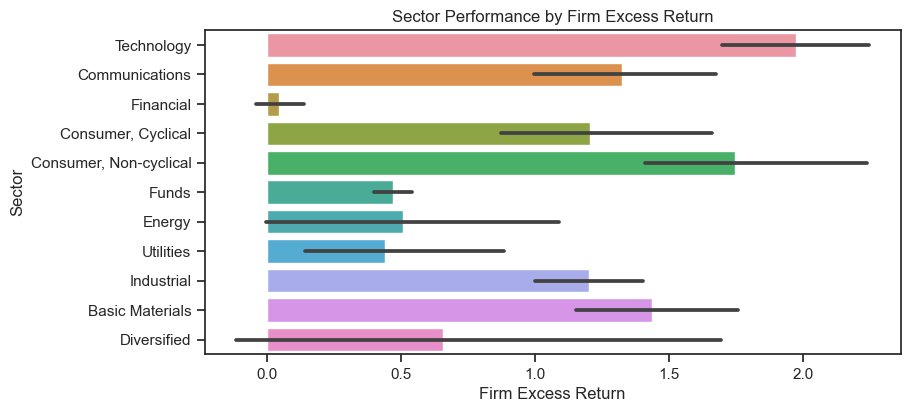

In [660]:
plt.figure(figsize=(8, 4))  # Set new size

# Create the bar plot
bar_sector_performance = sns.barplot(
    x="firm_excess_return",
    y="Sector",
    data=df2_reduced)

plt.title("Sector Performance by Firm Excess Return")
plt.xlabel("Firm Excess Return")
plt.ylabel("Sector")

plt.show()


In [663]:
df2.to_csv(os.path.join(path,"df_Vs3_exc_newbies.csv"))